In [1]:
from edc import print_info
print_info("geodb-explore")


***Notebook Title***  
GeoDB: Explore Datasets

***Notebook Description***  
Euro Data Cube GeoDB: Explore Datasets


***Notebook Dependencies***  
This notebook requires an active subscription to:
* EDC GeoDB
* EDC EOxHub Workspace
* EDC EOxHub Workspace


In [2]:
from edc import check_compatibility
check_compatibility("user-2022.07-00", dependencies=["GEODB"])



---------

The following environment variables are available:

* `GEODB_AUTH_AUD`, `GEODB_AUTH_CLIENT_ID`, `GEODB_AUTH_DOMAIN`, `GEODB_API_SERVER_URL`, `GEODB_AUTH_CLIENT_SECRET`, `GEODB_API_SERVER_PORT`


## Exploring Data




In [3]:
from xcube_geodb.core.geodb import GeoDBClient

In [4]:
# utility needed for plotting
import matplotlib.pyplot as plt

In [5]:
geodb = GeoDBClient()

### Get your user name

In [6]:
geodb.whoami

'geodb_418dfeac-15f0-4606-9edb-fd9eb722bf04'

In [7]:
ds = geodb.get_my_collections()

if ds[(ds.database == geodb.whoami) & (ds.collection == 'land_use')].collection.count() == 0:
    # Have a look at fiona feature schema
    collections = {
            "land_use": 
            {
                "crs": 3794,
                "properties": 
                {
                    "RABA_PID": "float", 
                    "RABA_ID": "float", 
                    "D_OD": "date"
                }
            }
        }


    geodb.create_collections(collections)
    import geopandas
    import os
    gdf = geopandas.read_file(os.path.expanduser("~/.shared/notebooks/eurodatacube/notebooks/curated/data/sample/land_use.shp"))
    geodb.insert_into_collection('land_use', gdf)

### List Datasets

__Step 1__: List all datasets a user has access to.

In [8]:
geodb.get_my_collections()

,owner,database,collection
0,geodb_49a05d04-5d72-4c0f-9065-6e6827fd1871,anja,E1
1,geodb_49a05d04-5d72-4c0f-9065-6e6827fd1871,anja,E10a1
2,geodb_49a05d04-5d72-4c0f-9065-6e6827fd1871,anja,E10a2
3,geodb_49a05d04-5d72-4c0f-9065-6e6827fd1871,anja,E11
4,geodb_49a05d04-5d72-4c0f-9065-6e6827fd1871,anja,E1a
...,...,...,...
912,geodb_cdcbc7da-dc26-42dc-bff9-d4336f98dca0,polar,polar_sea_ice
913,geodb_cdcbc7da-dc26-42dc-bff9-d4336f98dca0,polar,polar_sea_ice_3413
914,geodb_admin,public,land_use
915,geodb_d2c4722a-cc19-4ec1-b575-0cdb6876d4a7,test_duplicate,test


__Step 2__: Let's get the whole content of a particular data set.

In [9]:
gdf = geodb.get_collection('land_use')
gdf

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,1,2022-06-30T10:03:14.741129+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
1,2,2022-06-30T10:03:14.741129+00:00,None,"POLYGON ((453810.376 91150.199, 453812.552 911...",4770325,1300,2019-03-26
2,3,2022-06-30T10:03:14.741129+00:00,None,"POLYGON ((456099.635 97696.070, 456112.810 976...",2305689,7000,2019-02-25
3,4,2022-06-30T10:03:14.741129+00:00,None,"POLYGON ((455929.405 97963.785, 455933.284 979...",2305596,1100,2019-02-25
4,5,2022-06-30T10:03:14.741129+00:00,None,"POLYGON ((461561.512 96119.256, 461632.114 960...",2310160,1100,2019-03-11
...,...,...,...,...,...,...,...
9822,9823,2022-06-30T10:03:17.76853+00:00,None,"POLYGON ((460637.334 96865.891, 460647.927 969...",6253989,1600,2019-03-08
9823,9824,2022-06-30T10:03:17.76853+00:00,None,"POLYGON ((459467.868 96839.686, 459467.770 968...",6252044,1600,2019-03-26
9824,9825,2022-06-30T10:03:17.76853+00:00,None,"POLYGON ((459488.998 94066.248, 459498.145 940...",6245985,2000,2019-04-08
9825,9826,2022-06-30T10:03:17.76853+00:00,None,"POLYGON ((459676.680 94000.000, 459672.469 939...",6245986,2000,2019-02-20


__Step 3__: Plot the GeoDataframe, select a reasonable column to diplay

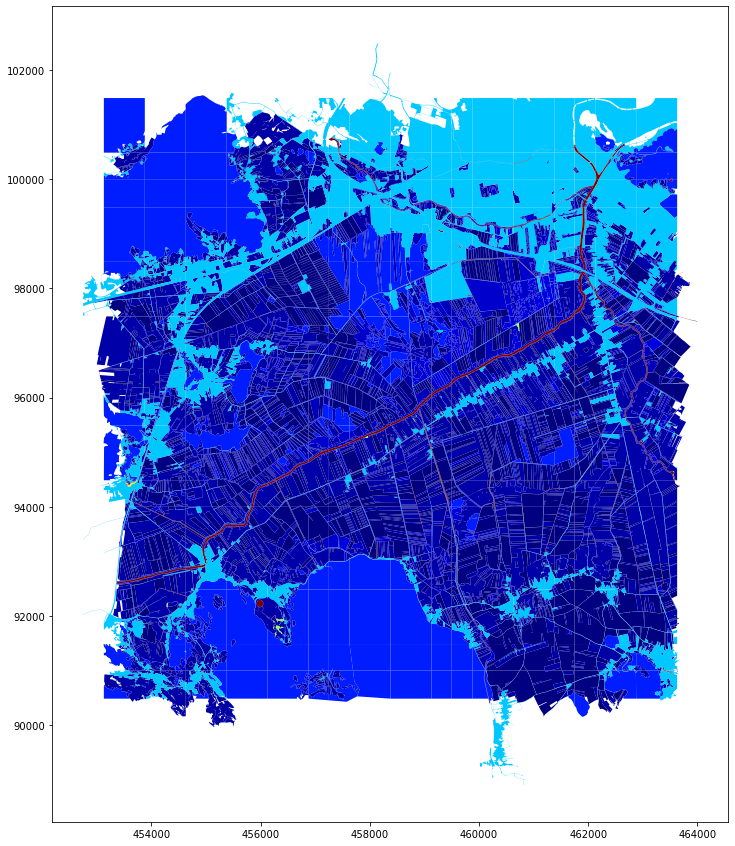

In [10]:
gdf.plot(column="raba_id", figsize=(15,15), cmap = 'jet')
plt.show()

__Step 5__: Subselect the data. Here: Select a specific use by defining an ID value to choose 

In [11]:
gdfsub = geodb.get_collection('land_use', query='raba_id=eq.1410')
gdfsub.head()

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,1,2022-06-30T10:03:14.741129+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
1,62,2022-06-30T10:03:14.741129+00:00,None,"POLYGON ((457261.001 96349.254, 457256.831 963...",3596498,1410,2019-01-05
2,22,2022-06-30T10:03:14.741129+00:00,None,"POLYGON ((455384.809 97907.054, 455380.659 979...",3616776,1410,2019-02-25
3,28,2022-06-30T10:03:14.741129+00:00,None,"POLYGON ((462585.734 93088.987, 462567.020 930...",3826126,1410,2019-01-23
4,32,2022-06-30T10:03:14.741129+00:00,None,"POLYGON ((457748.827 96167.354, 457748.394 961...",2309744,1410,2019-01-05


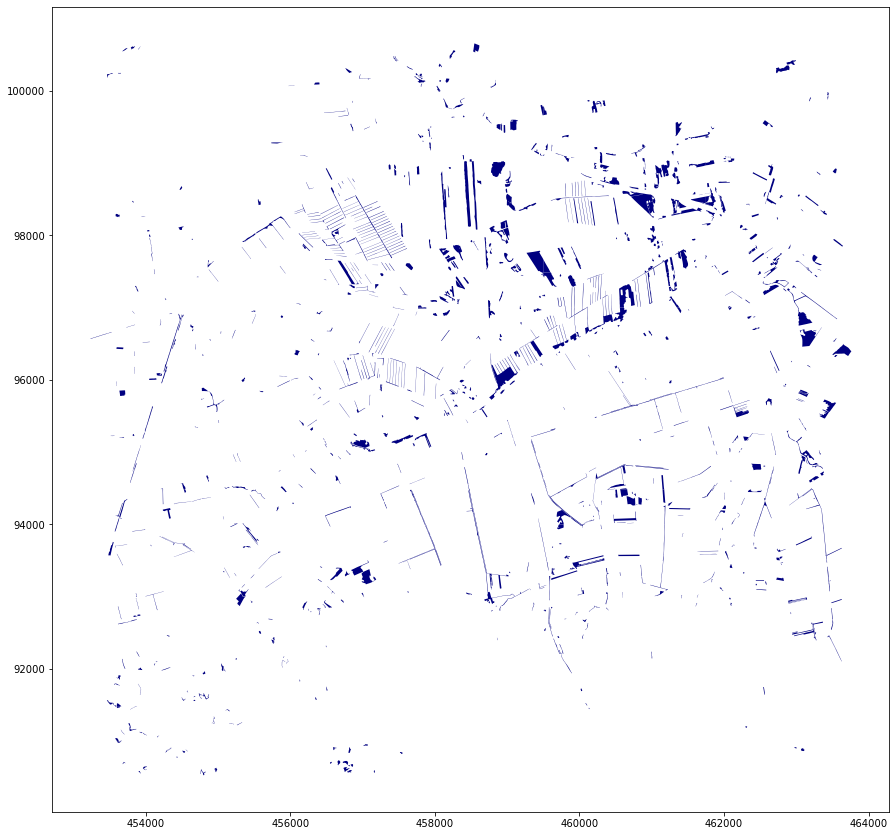

In [12]:
gdfsub.plot(column="raba_id", figsize=(15,15), cmap = 'jet')
plt.show()

__Step 6__: Filter by bbox, limit it to 200 entries

In [13]:
gdf = geodb.get_collection_by_bbox(collection="land_use", bbox = (452750.0, 88909.549, 464000.0, 102486.299), comparison_mode="contains", bbox_crs=3794, limit=200, offset=10)
gdf

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,11,2022-06-30T10:03:14.741129+00:00,None,"POLYGON ((460137.998 95628.898, 460111.001 956...",5983161,1100,2019-03-11
1,12,2022-06-30T10:03:14.741129+00:00,None,"POLYGON ((453673.609 91328.224, 453678.929 913...",5983074,1600,2019-03-26
2,13,2022-06-30T10:03:14.741129+00:00,None,"POLYGON ((460312.295 96127.114, 460300.319 961...",5983199,1600,2019-03-11
3,14,2022-06-30T10:03:14.741129+00:00,None,"POLYGON ((460459.445 96117.356, 460470.516 961...",5983217,1100,2019-03-11
4,15,2022-06-30T10:03:14.741129+00:00,None,"POLYGON ((457798.753 99628.982, 457783.076 996...",6299143,1600,2019-03-04
...,...,...,...,...,...,...,...
195,206,2022-06-30T10:03:14.741129+00:00,None,"POLYGON ((458460.702 94486.435, 458450.740 944...",5966292,1321,2019-01-05
196,207,2022-06-30T10:03:14.741129+00:00,None,"POLYGON ((458469.826 94472.438, 458463.978 944...",5966293,1500,2019-03-26
197,208,2022-06-30T10:03:14.741129+00:00,None,"POLYGON ((455171.131 90548.851, 455158.322 905...",3590222,1500,2019-01-18
198,209,2022-06-30T10:03:14.741129+00:00,None,"POLYGON ((456420.815 92626.252, 456428.630 926...",6305200,1500,2019-03-14


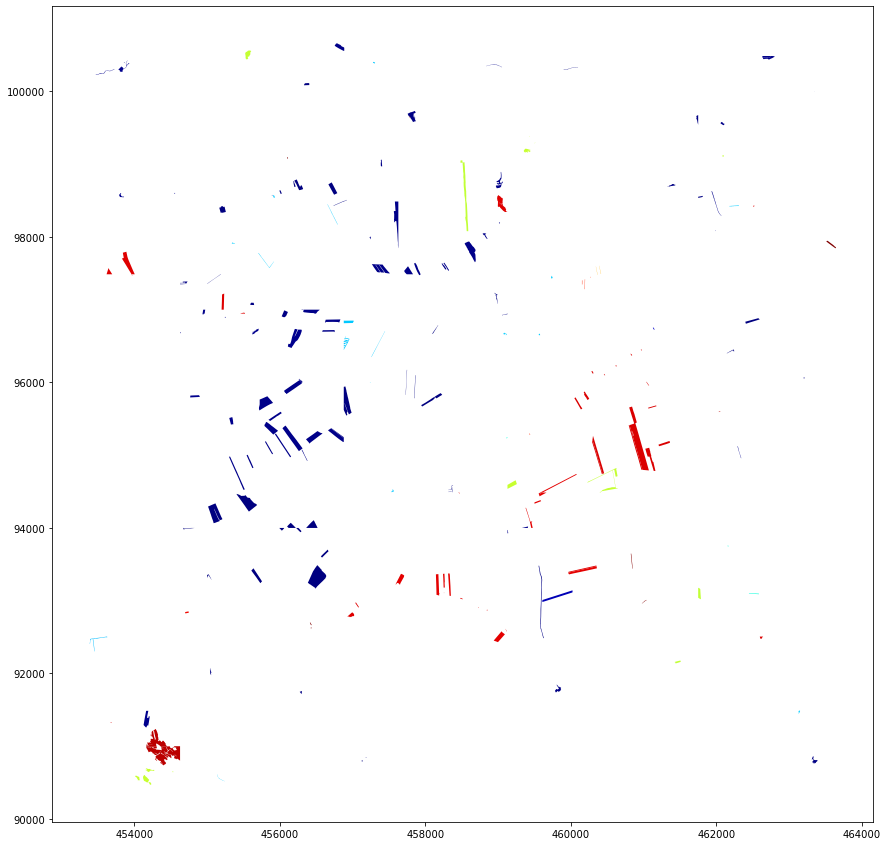

In [14]:
gdf.plot(column="raba_pid", figsize=(15,15), cmap = 'jet')
plt.show()

__Step 6__: Fltering using PostGres Syntax; see https://www.postgresql.org/docs/9.1/index.html for details

In [15]:
gdf = geodb.get_collection_pg(collection='land_use', where='raba_id=1410')
gdf.head()

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,1,2022-06-30T10:03:14.741129+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
1,62,2022-06-30T10:03:14.741129+00:00,None,"POLYGON ((457261.001 96349.254, 457256.831 963...",3596498,1410,2019-01-05
2,22,2022-06-30T10:03:14.741129+00:00,None,"POLYGON ((455384.809 97907.054, 455380.659 979...",3616776,1410,2019-02-25
3,28,2022-06-30T10:03:14.741129+00:00,None,"POLYGON ((462585.734 93088.987, 462567.020 930...",3826126,1410,2019-01-23
4,32,2022-06-30T10:03:14.741129+00:00,None,"POLYGON ((457748.827 96167.354, 457748.394 961...",2309744,1410,2019-01-05


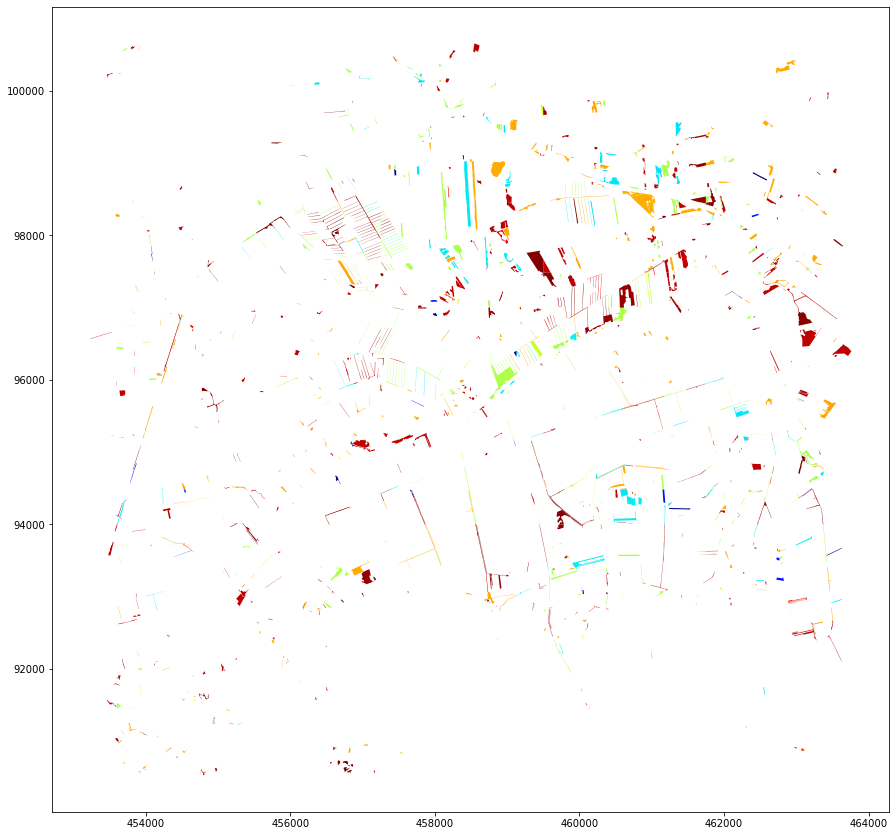

In [16]:
gdf.plot(column="raba_pid", figsize=(15,15), cmap = 'jet')
plt.show()

__Step 7__: Fltering using PostGres Syntax Allowing Aggregation
Here according to data, note that the data set has been reduced to 200 entries above

In [17]:
df = geodb.get_collection_pg('land_use', where='raba_id=1410', group='d_od', select='COUNT(d_od) as ct, d_od')
df.head()

,ct,d_od
0,12,2019-03-21
1,47,2019-02-25
2,17,2019-03-13
3,26,2019-02-20
4,2,2019-04-29
